## Introduction to Data Science | 4022 | Dr. Bahrak & Dr. Yaghoobzadeh
## CA4
***
### Amirreza Akbari | 810899045
### Reza Baghestani | 810899046
### Hananeh Jamali | 810899053
***
### 1402/02/05

## Install & Import Libraries

In [21]:
import importlib.util

# Check if scikit-learn is installed
if importlib.util.find_spec("sklearn") is None:
    # Install scikit-learn
    !pip install scikit-learn

# Check if pandas is installed
if importlib.util.find_spec("pandas") is None:
    # Install pandas
    !pip install pandas
    
# Check if matplotlib is installed
if importlib.util.find_spec("matplotlib") is None:
    # Install matplotlib
    !pip install matplotlib
    
# Check if tabulate is installed
if importlib.util.find_spec("tabulate") is None:
    # Install tabulate
    !pip install tabulate

# Check if statsmodels is installed
if importlib.util.find_spec("statsmodels") is None:
    # Install statsmodels
    !pip install statsmodels

from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from tabulate import tabulate
from scipy.stats import linregress

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


## Warm-Up


----------------------------------------------     STEP 1     ----------------------------------------------
dataset successfully loaded and saved into a CSV file

----------------------------------------------     STEP 2     ----------------------------------------------
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
5 -0.092695 -0.044642 -0.040696 -0.019442 -0.068991 -0.079288  0.041277   
6 -0.045472  0.050680 -0.047163 -0.015999 -0.040096 -0.024800  0.000779   
7  0.063504  0.050680 -0.001895  0.066629  0.090620  0.108914  0.022869   
8  0.041708  0.050680  0.061696 -0.040099 -0.013953

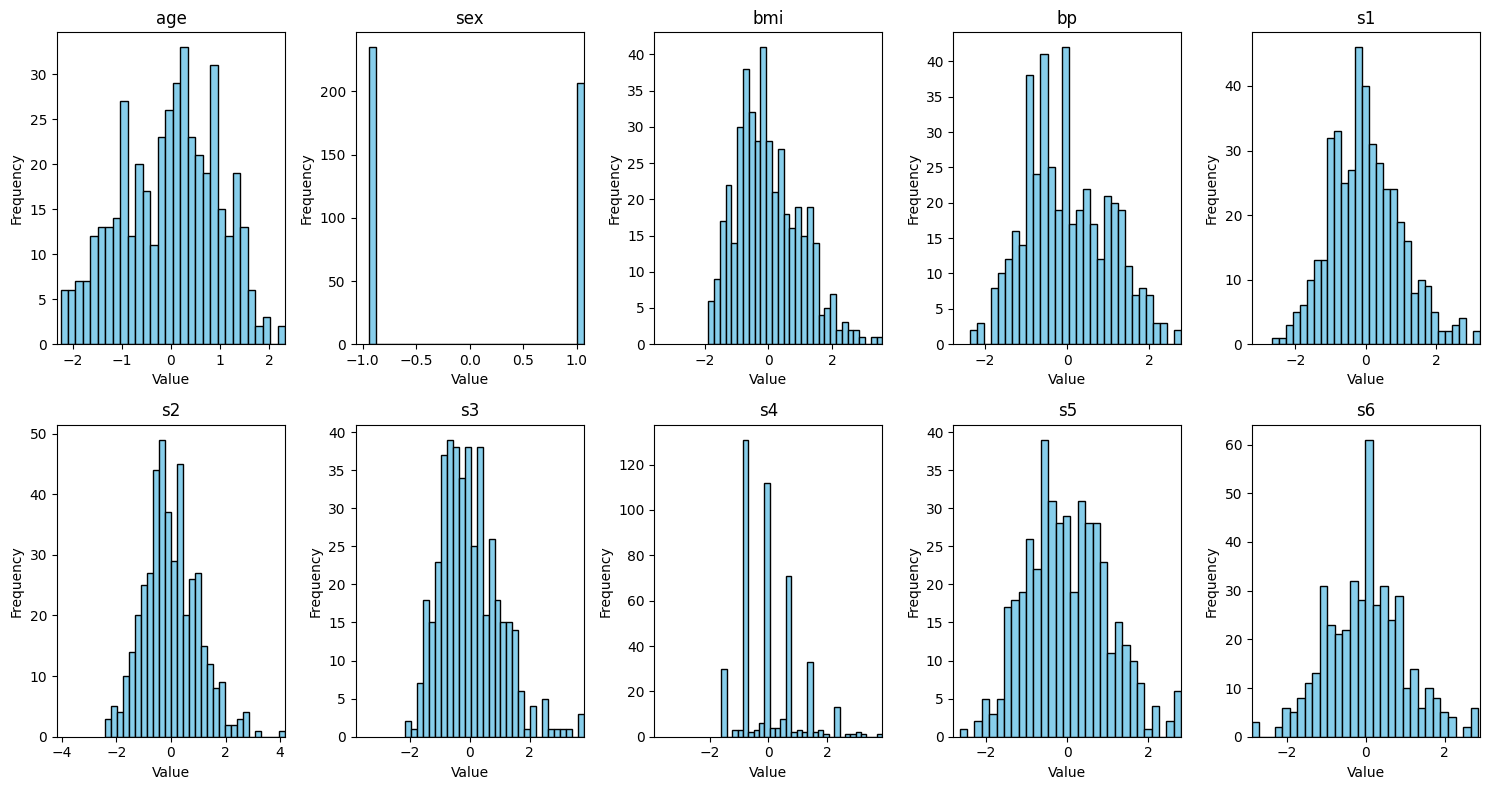

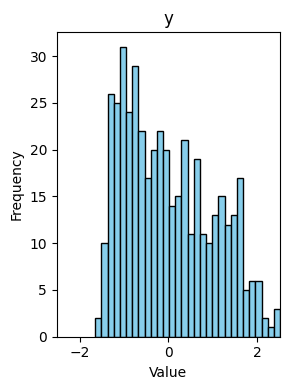


----------------------------------------------     STEP 6     ----------------------------------------------
data successfully split into training and testing sets

----------------------------------------------     STEP 7     ----------------------------------------------
Number of instances in training set: 419
Number of instances in testing set: 23


In [22]:
print("\n----------------------------------------------     STEP 1     ----------------------------------------------")
# Step 1: Load the diabetes dataset from scikit-learn
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Convert the dataset to a DataFrame for easier manipulation
diabetes_df = pd.DataFrame(X, columns=diabetes.feature_names)

# Add the target variable 'y' to the DataFrame
diabetes_df['y'] = y

# Save the DataFrame to a CSV file
diabetes_df.to_csv('diabetes_dataset.csv', index=False)

print("dataset successfully loaded and saved into a CSV file")

print("\n----------------------------------------------     STEP 2     ----------------------------------------------")
# Step 2: Display the first ten rows of the dataset
print(diabetes_df.head(10))

print("\n----------------------------------------------     STEP 3     ----------------------------------------------")
# Step 3: Print the data types of each feature
print(diabetes_df.dtypes)

print("\n----------------------------------------------     STEP 4     ----------------------------------------------")
# Step 4: Check for any missing values in the dataset
missing_values = diabetes_df.isnull().sum().sum()
if missing_values == 0:
    print("No missing values in the dataset.")
else:
    print("There are missing values in the dataset.")
    print("Missing values are replaced with NAN value.")
    # Replace missing values with NaN
    diabetes_df.replace(-1, np.nan, inplace=True)

print("\n----------------------------------------------     STEP 5     ----------------------------------------------")
# Step 5: Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y = y.reshape(-1, 1)
y_scaled = scaler.fit_transform(y)

# Calculate the mean, standard deviation, minimum, median and maximum of each feature after normalization
X_mean_normalized = X_scaled.mean(axis=0)
X_std_dev_normalized = X_scaled.std(axis=0)
X_min_values = X_scaled.min(axis=0)
X_median_values = np.median(X_scaled, axis=0)
X_max_values = X_scaled.max(axis=0)
y_mean_normalized = y_scaled.mean(axis=0)
y_std_dev_normalized = y_scaled.std(axis=0)
y_min_values = y_scaled.min(axis=0)
y_median_values = np.median(y_scaled, axis=0)
y_max_values = y_scaled.max(axis=0)

# Create a DataFrame to display the statistics after normalization
X_stats_df = pd.DataFrame({
    'Feature': diabetes.feature_names,
    'Mean': X_mean_normalized,
    'Std Dev': X_std_dev_normalized,
    'Minimum': X_min_values,
    'Median': X_median_values,
    'Maximum': X_max_values
})
y_stats_df = pd.DataFrame({
    'Feature': "y",
    'Mean': y_mean_normalized,
    'Std Dev': y_std_dev_normalized,
    'Minimum': y_min_values,
    'Median': y_median_values,
    'Maximum': y_max_values
})

# Display the DataFrame
print(X_stats_df)
print()
print(y_stats_df)

# Create a grid of subplots with 2 rows and 5 columns
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 8))

# Flatten the axes array to iterate over each subplot
axes = axes.flatten()

# Plot each feature
for i, (feature, data) in enumerate(zip(diabetes.feature_names, X_scaled.T)):
    # Determine the x-limits based on the maximum absolute value
    x_limit = max(abs(np.min(data)), abs(np.max(data)))
    axes[i].hist(data, bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(feature)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].set_xlim(-x_limit, x_limit)  # Set x-limits dynamically

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

# Plot target variable
plt.figure(figsize=(3, 4))
x_limit = max(abs(np.min(y_scaled)), abs(np.max(y_scaled)))
plt.hist(y_scaled, bins=30, color='skyblue', edgecolor='black')
plt.title('y')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xlim(-x_limit, x_limit)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

print("\n----------------------------------------------     STEP 6     ----------------------------------------------")
# Step 6: Split the data into training and testing sets
y_scaled = y_scaled.reshape(-1)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.05, random_state=42)
print("data successfully split into training and testing sets")

print("\n----------------------------------------------     STEP 7     ----------------------------------------------")
# Step 7: Display the number of instances in both the training and testing datasets
print("Number of instances in training set:", X_train.shape[0])
print("Number of instances in testing set:", X_test.shape[0])


## Main Task

### Part 1: Functions' Implementation

In [23]:
def mean_squared_error(y_true, y_pred):
    """
    Calculate the Mean Squared Error (MSE) between the true and predicted values.

    Parameters:
    y_true : array-like of shape (n_samples,)
        True target values.
    y_pred : array-like of shape (n_samples,)
        Predicted target values.

    Returns:
    mse : float
        Mean Squared Error (MSE) between y_true and y_pred.
    """
    mse = np.mean((y_true - y_pred) ** 2)
    return mse

def mean_absolute_error(y_true, y_pred):
    """
    Calculate the Mean Absolute Error (MAE) between the true and predicted values.

    Parameters:
    y_true : array-like of shape (n_samples,)
        True target values.
    y_pred : array-like of shape (n_samples,)
        Predicted target values.

    Returns:
    mae : float
        Mean Absolute Error (MAE) between y_true and y_pred.
    """
    mae = np.mean(np.abs(y_true - y_pred))
    return mae

def root_mean_squared_error(y_true, y_pred):
    """
    Calculate the Root Mean Squared Error (RMSE) between the true and predicted values.

    Parameters:
    y_true : array-like of shape (n_samples,)
        True target values.
    y_pred : array-like of shape (n_samples,)
        Predicted target values.

    Returns:
    rmse : float
        Root Mean Squared Error (RMSE) between y_true and y_pred.
    """
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse

def r2_score(y_true, y_pred):
    """
    Calculate the R² Score (Coefficient of Determination) between the true and predicted values.

    Parameters:
    y_true : array-like of shape (n_samples,)
        True target values.
    y_pred : array-like of shape (n_samples,)
        Predicted target values.

    Returns:
    r2 : float
        R² Score (Coefficient of Determination) between y_true and y_pred.
    """
    # Calculate the total sum of squares (TSS)
    tss = np.sum((y_true - np.mean(y_true)) ** 2)
    # Calculate the residual sum of squares (RSS)
    rss = np.sum((y_true - y_pred) ** 2)
    # Calculate R² Score
    r2 = 1 - (rss / tss)
    return r2
    

### Part 2: Building and Training the Linear Regression Model

In [24]:
class LinearRegressionFromScratch:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        """
        Fit the linear regression model to the training data.

        Parameters:
        X : array-like of shape (n_samples, n_features)
            Training data.
        y : array-like of shape (n_samples,)
            Target values.
        """
        # Add a column of ones to X for the intercept term
        X_augmented = np.column_stack((np.ones(len(X)), X))

        # Compute the coefficients using the normal equation
        beta = np.linalg.inv(X_augmented.T @ X_augmented) @ X_augmented.T @ y

        self.intercept_ = beta[0]
        self.coef_ = beta[1:]

    def predict(self, X):
        """
        Predict target values for the given data.

        Parameters:
        X : array-like of shape (n_samples, n_features)
            Data to be predicted.

        Returns:
        y_pred : array-like of shape (n_samples,)
            Predicted target values.
        """
        if self.coef_ is None or self.intercept_ is None:
            raise ValueError("Model has not been trained yet. Call fit() first.")

        # Add a column of ones to X for the intercept term
        X_augmented = np.column_stack((np.ones(len(X)), X))

        # Compute predictions
        y_pred = X_augmented @ np.concatenate(([self.intercept_], self.coef_))

        return y_pred

# Step 1: Prepare the Data
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Step 2: Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y = y.reshape(-1, 1)
y_scaled = scaler.fit_transform(y)
y_scaled = y_scaled.reshape(-1)

# Step 3: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.05, random_state=42)

# Step 4: Instantiate the Model
model = LinearRegressionFromScratch()
# model = LinearRegression()    # imported linear regression model from scikit-learn library.

# Step 5: Train the Model
model.fit(X_train, y_train)


### Part 3: Model Evaluation

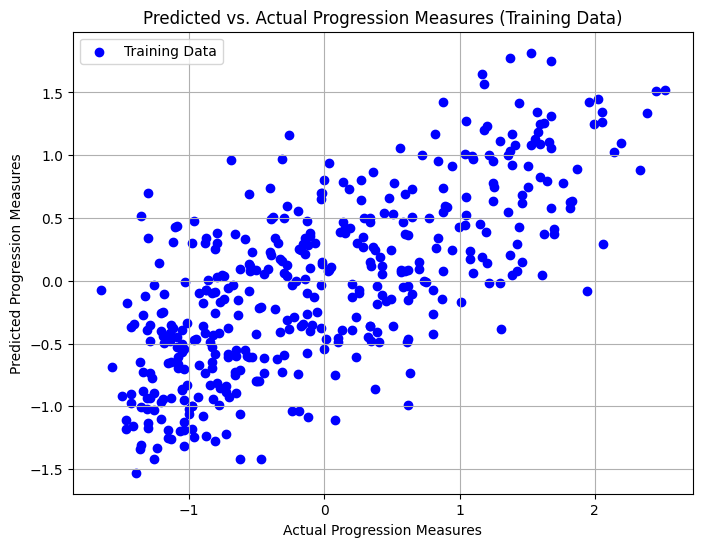

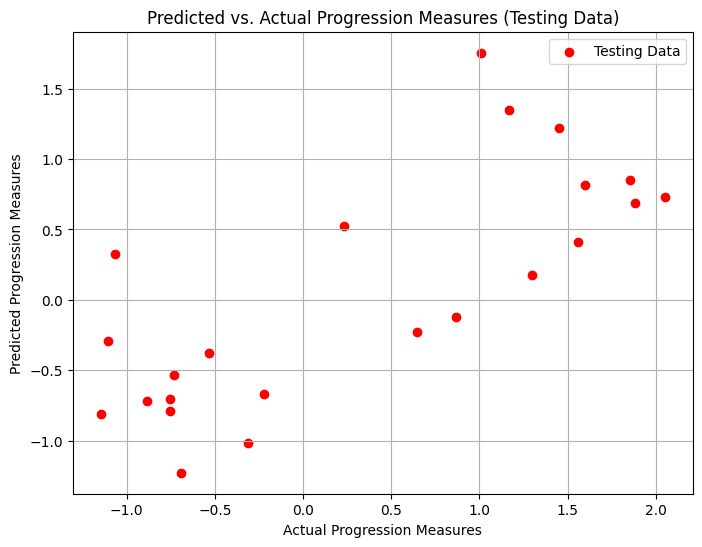


Result of Linear Regression Model

+-----------------------+----------+---------+----------+------------+
| Data Type/Optimizer   |      MSE |     MAE |     RMSE |   R² Score |
+=======================+==========+=========+==========+============+
| Train Set             | 0.477449 | 0.55793 | 0.690977 |   0.513588 |
+-----------------------+----------+---------+----------+------------+
| Test Set              | 0.592948 | 0.63993 | 0.770031 |   0.516379 |
+-----------------------+----------+---------+----------+------------+


In [25]:
# Step 1: Compare Predicted vs. Actual Values
# Predict progression measures for both training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Scatter plot for training data
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Training Data')
plt.xlabel('Actual Progression Measures')
plt.ylabel('Predicted Progression Measures')
plt.title('Predicted vs. Actual Progression Measures (Training Data)')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot for testing data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='red', label='Testing Data')
plt.xlabel('Actual Progression Measures')
plt.ylabel('Predicted Progression Measures')
plt.title('Predicted vs. Actual Progression Measures (Testing Data)')
plt.legend()
plt.grid(True)
plt.show()

# Step 2: Evaluate the Regression Model
# Calculate evaluation metrics for training data
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = root_mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate evaluation metrics for testing data
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = root_mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Organize evaluation metrics into a list of lists
data = [
    ["Train Set", mse_train, mae_train, rmse_train, r2_train],
    ["Test Set", mse_test, mae_test, rmse_test, r2_test]
]

# Print the evaluation metrics in a table
print("\nResult of Linear Regression Model\n")
print(tabulate(data, headers=["Data Type/Optimizer", "MSE", "MAE", "RMSE", "R² Score"], tablefmt="grid"))


### Part 4: Ordinary Least Squares

In [26]:
# Add a constant term to the predictors (X) for the intercept
X_train_with_const = sm.add_constant(X_train)

# Fit the linear regression model using OLS
model = sm.OLS(y_train, X_train_with_const).fit()

# Print the summary of the model
print(model.summary())

# Extract p-values for each coefficient
p_values = model.pvalues[1:]  # Exclude the constant term

# Prepare data for tabulate
table_data = []
for feature, p_value in zip(diabetes.feature_names, p_values):
    table_data.append([feature, p_value])

# Print the table
print()
print(tabulate(table_data, headers=["Feature", "P-value"], tablefmt="grid"))


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     43.08
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           7.57e-58
Time:                        22:30:13   Log-Likelihood:                -439.65
No. Observations:                 419   AIC:                             901.3
Df Residuals:                     408   BIC:                             945.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0137      0.034     -0.402      0.6